In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

from graspy.embed import AdjacencySpectralEmbed, LaplacianSpectralEmbed
from graspy.cluster import GaussianCluster, AutoGMMCluster


In [2]:
context = sns.plotting_context(context="talk", font_scale=1.7)
sns.set_context(context)

In [10]:
!ln -s /Users/TingshanLiu/Desktop/2020 summer/TL_maggot/notebooks/HSBM.py HSBM.py

usage: ln [-Ffhinsv] source_file [target_file]
       ln [-Ffhinsv] source_file ... target_dir
       link source_file target_file


In [11]:
from HSBM import RecursiveCluster

## synthetic Gaussian mixture data

### 1D 2GMM

In [5]:
def GM_init(mean, n_components, cov_scale, covariance_type):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(np.random.rand(n_components+1, 2))
    gmm.means_ = mean
    gmm.covariances_ = np.repeat(cov_scale, n_components)
    gmm.weights_ = np.array([1/n_components, 1/n_components])
    gmm.precisions_cholesky_ = 0

    return gmm

In [6]:
def GM_line_init(center, length, cov_scale):
    
    mean = np.array([[center - length],[center + length]])
    gmm = GM_init(mean, 2, cov_scale, "spherical")
    
    # to make sure that we get exactly one sample from either component
    # and the samples are collected the right order
    len_0 = 0
    len_1 = 0
    x_new = []
    y_new = []
    while len_0 < 1 or len_1 < 1:
        x, y = gmm.sample(1)
        if y == 0 and len_0 < 1:
            len_0 += 1
            x_new = np.append(x_new, x)
            y_new = np.append(y_new, y)
        if y == 1 and len_1 < 1:
            len_1 += 1
            x_new = np.append(x_new, x)
            y_new = np.append(y_new, y)
    x_new.sort()
    y_new.sort()
    return x_new, y_new 

In [7]:
def GM_line(cov_scale, n_level, n_sample):
    cov = 1
    length = 10
    center = 0
    x, _ = GM_line_init(center=center, length=length, cov_scale=cov)
    x_pre = x.reshape((-1,1))
    for i in range(1, n_level):
        cov = cov * cov_scale
        length = length * cov_scale
        x_new = np.zeros((1,1))
        y_new = np.zeros((1,1))
        for j in range(len(x_pre)):
            center = x_pre[j][0]
            x_post, y_post = GM_line_init(center=center, length=length, cov_scale=cov)
            y_post = y_post[:] + j * 2
            x_new = np.append(x_new, x_post).reshape(-1,1)
            y_new = np.append(y_new, y_post).reshape(-1,1)
        x_pre = x_new[1:, :]

    x = np.zeros((1,1))
    y = np.zeros((1,1))
    x_init = x_new[1:, :]
    for i in range(len(x_init)):
        gmm = GM_init(np.array([x_init[i]]), 1, cov, "spherical")
        x_new, _ = gmm.sample(n_sample)
        x = np.append(x, x_new)
        y = np.append(y, np.repeat(i, n_sample))

    return x[1:].reshape((-1,1)), y[1:]

In [9]:
n_level = 3
y_by_level = np.zeros((len(y), n_level))
y_by_level[:,-1] = y
for i in range(n_level-1):
    n_clus = 2 ** (i+1)
    for j in range(n_clus):
        y_by_level[j*len(y)//n_clus : (j+1)*len(y)//n_clus, i] = j

#### binary clustering

In [270]:
n_sample = 40
scales = np.linspace(0.1, 0.5, num=5)
ARIs = {}
for s in range(len(scales)):
    print("scale =", s)
    for i in range(n_sample):
        print("n_sample =", i)
        x,y = GM_line(scales[s], 3, 100)
        rc = RecursiveCluster(min_components=1, max_components=2)
        pred = rc.fit_predict(x).to_numpy()[:,1:]
        ARI = np.zeros((y_by_level.shape[1], pred.shape[1]))
        for j in range(y_by_level.shape[1]):
            for k in range(pred.shape[1]):
                ARI[j,k] = adjusted_rand_score(y_by_level[:,j], pred[:,k])
        ARIs[s,i] = ARI

scale = 0
n_sample = 0
n_sample = 1
n_sample = 2
n_sample = 3
n_sample = 4
n_sample = 5
n_sample = 6
n_sample = 7
n_sample = 8
n_sample = 9
n_sample = 10
n_sample = 11
n_sample = 12
n_sample = 13
n_sample = 14
n_sample = 15
n_sample = 16
n_sample = 17
n_sample = 18
n_sample = 19
n_sample = 20
n_sample = 21
n_sample = 22
n_sample = 23
n_sample = 24
n_sample = 25
n_sample = 26
n_sample = 27
n_sample = 28
n_sample = 29
n_sample = 30
n_sample = 31
n_sample = 32
n_sample = 33
n_sample = 34
n_sample = 35
n_sample = 36
n_sample = 37
n_sample = 38
n_sample = 39
scale = 1
n_sample = 0
n_sample = 1
n_sample = 2
n_sample = 3
n_sample = 4
n_sample = 5
n_sample = 6
n_sample = 7
n_sample = 8
n_sample = 9
n_sample = 10
n_sample = 11
n_sample = 12
n_sample = 13
n_sample = 14
n_sample = 15
n_sample = 16
n_sample = 17
n_sample = 18
n_sample = 19
n_sample = 20
n_sample = 21
n_sample = 22
n_sample = 23
n_sample = 24
n_sample = 25
n_sample = 26
n_sample = 27
n_sample = 28
n_sample = 29
n_sample = 30
n_samp

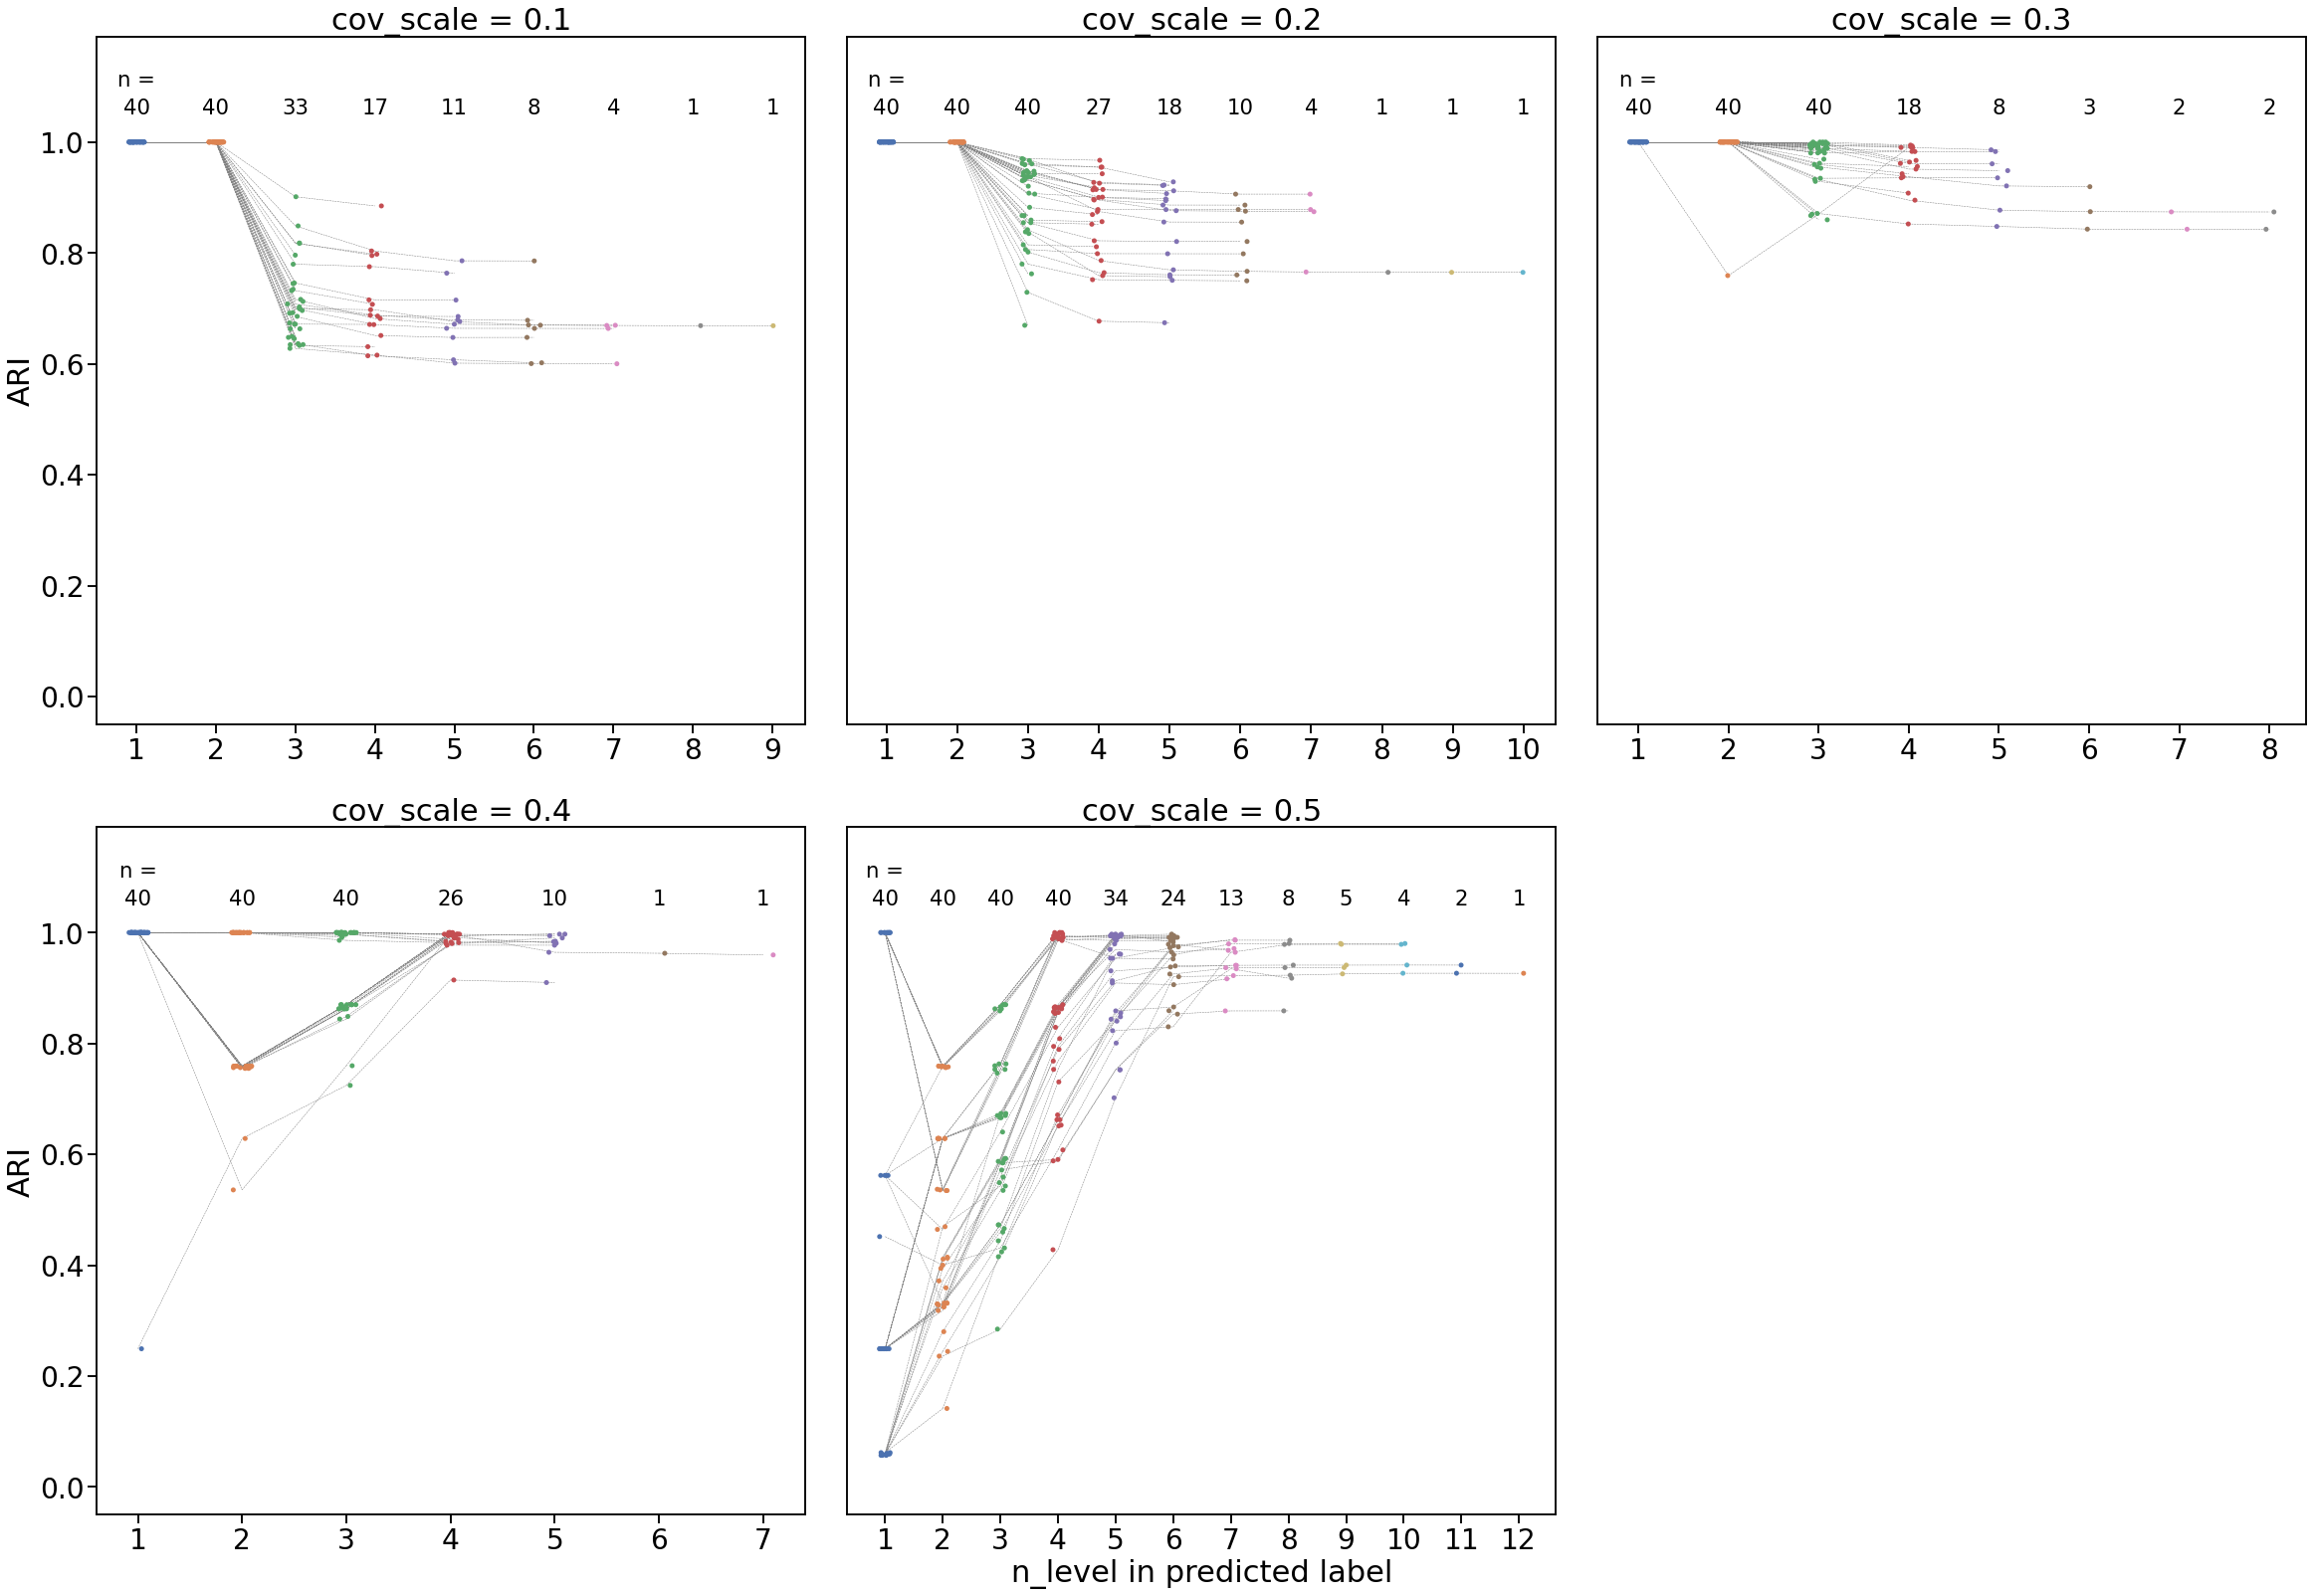

In [441]:
fig,axs = plt.subplots(2,3, figsize=(33,23))
s = -1
for i1 in range(2):
    for j1 in range(3):
        ax = axs[i1,j1]
        if s < 4:
            s += 1
            b = [ARIs[s,i] for i in range(40)]
            df = pd.DataFrame([])
            for i in range(40):
                b1 = [b[i][0,0], b[i][1,1]]
                for j in range(len(b[i][2,2:])):
                    b1.append(b[i][2,2:][j])
                b1 = pd.DataFrame(np.array(b1).reshape(1,-1))
                df = pd.concat([df, b1])

            df.columns = [n+1 for n in range(df.shape[1])]
            df1 = df
            df = df.melt(value_vars=[n+1 for n in range(df.shape[1])], var_name="level", value_name="ARI")
            sns.stripplot(data=df, x="level", y="ARI", ax=ax, palette="deep")
            # ylim=(-0.05, 1.05),
            # plt.ylim(ymax=1.1)
            ax.set(ylim=(-0.05, 1.19), title="cov_scale = %.1f"%(scales[s]))
            for i in range(df1.shape[1]-1):
                ax.plot([np.zeros((40))+i, np.zeros((40))+i+1],[df1.iloc[:,i], df1.iloc[:,i+1]], color = 'grey', linewidth = 0.5, linestyle = '--')
            if s < 4:
                ax.set(xlabel="")
            else:
                ax.set(xlabel="n_level in predicted label")
            if s == 1 or s == 2 or s == 4:
                ax.set_yticks([])
                ax.set(ylabel="")

            ns = [df1[i+1].count() for i in range(df1.shape[1])]
            # cs = np.append(np.array([2,4]),np.repeat(8,len(ns)-2))
            ax.text(0,1.1,"n =", ha="center", fontsize="x-small")
            for i in range(len(ns)):
                ax.text(i,1.05, str(ns[i]), ha="center", fontsize="x-small")
            # ax.text(0,1.2,"n_cluster in true label =", ha="left", fontsize="x-small")
            # for i in range(len(ns)):
            #     ax.text(i,1.15, str(cs[i]), ha="center", fontsize="x-small")

        else:
            ax.axis("off")

plt.tight_layout()
# plt.savefig("1")

#### (non-binary clustering) unrestricted max_comp

In [21]:
n_sample = 30
scales = np.linspace(0.1, 0.5, num=5)
ARIs = {}
for s in range(len(scales)):
    print("scale =", s)
    for i in range(n_sample):
        print("n_sample =", i)
        x,y = GM_line(scales[s], 3, 100)
        rc = RecursiveCluster(min_components=1, max_components=10)
        pred = rc.fit_predict(x).to_numpy()[:,1:]
        ARI = np.zeros((y_by_level.shape[1], pred.shape[1]))
        for j in range(y_by_level.shape[1]):
            for k in range(pred.shape[1]):
                ARI[j,k] = adjusted_rand_score(y_by_level[:,j], pred[:,k])
        ARIs[s,i] = ARI

scale = 0
n_sample = 0
n_sample = 1
n_sample = 2
n_sample = 3
n_sample = 4
n_sample = 5
n_sample = 6
n_sample = 7
n_sample = 8
n_sample = 9
n_sample = 10
n_sample = 11
n_sample = 12
n_sample = 13
n_sample = 14
n_sample = 15
n_sample = 16
n_sample = 17
n_sample = 18
n_sample = 19
n_sample = 20
n_sample = 21
n_sample = 22
n_sample = 23
n_sample = 24
n_sample = 25
n_sample = 26
n_sample = 27
n_sample = 28
n_sample = 29
scale = 1
n_sample = 0
n_sample = 1
n_sample = 2
n_sample = 3
n_sample = 4
n_sample = 5
n_sample = 6
n_sample = 7
n_sample = 8
n_sample = 9
n_sample = 10
n_sample = 11
n_sample = 12
n_sample = 13
n_sample = 14
n_sample = 15
n_sample = 16
n_sample = 17
n_sample = 18
n_sample = 19
n_sample = 20
n_sample = 21
n_sample = 22
n_sample = 23
n_sample = 24
n_sample = 25
n_sample = 26
n_sample = 27
n_sample = 28
n_sample = 29
scale = 2
n_sample = 0
n_sample = 1
n_sample = 2
n_sample = 3
n_sample = 4
n_sample = 5
n_sample = 6
n_sample = 7
n_sample = 8
n_sample = 9
n_sample = 10
n_samp

In [273]:
pickle_in = open("ARIs_line_3lvl_100pts_40sample_bi.pickle", "rb")
a = pickle.load(pickle_in)

In [41]:
for i in range(5):
    for j in range(10):
        a[(i,(j+30))] = a[(i,j)]
        del a[(i,j)]

In [43]:
# a1.update(a)

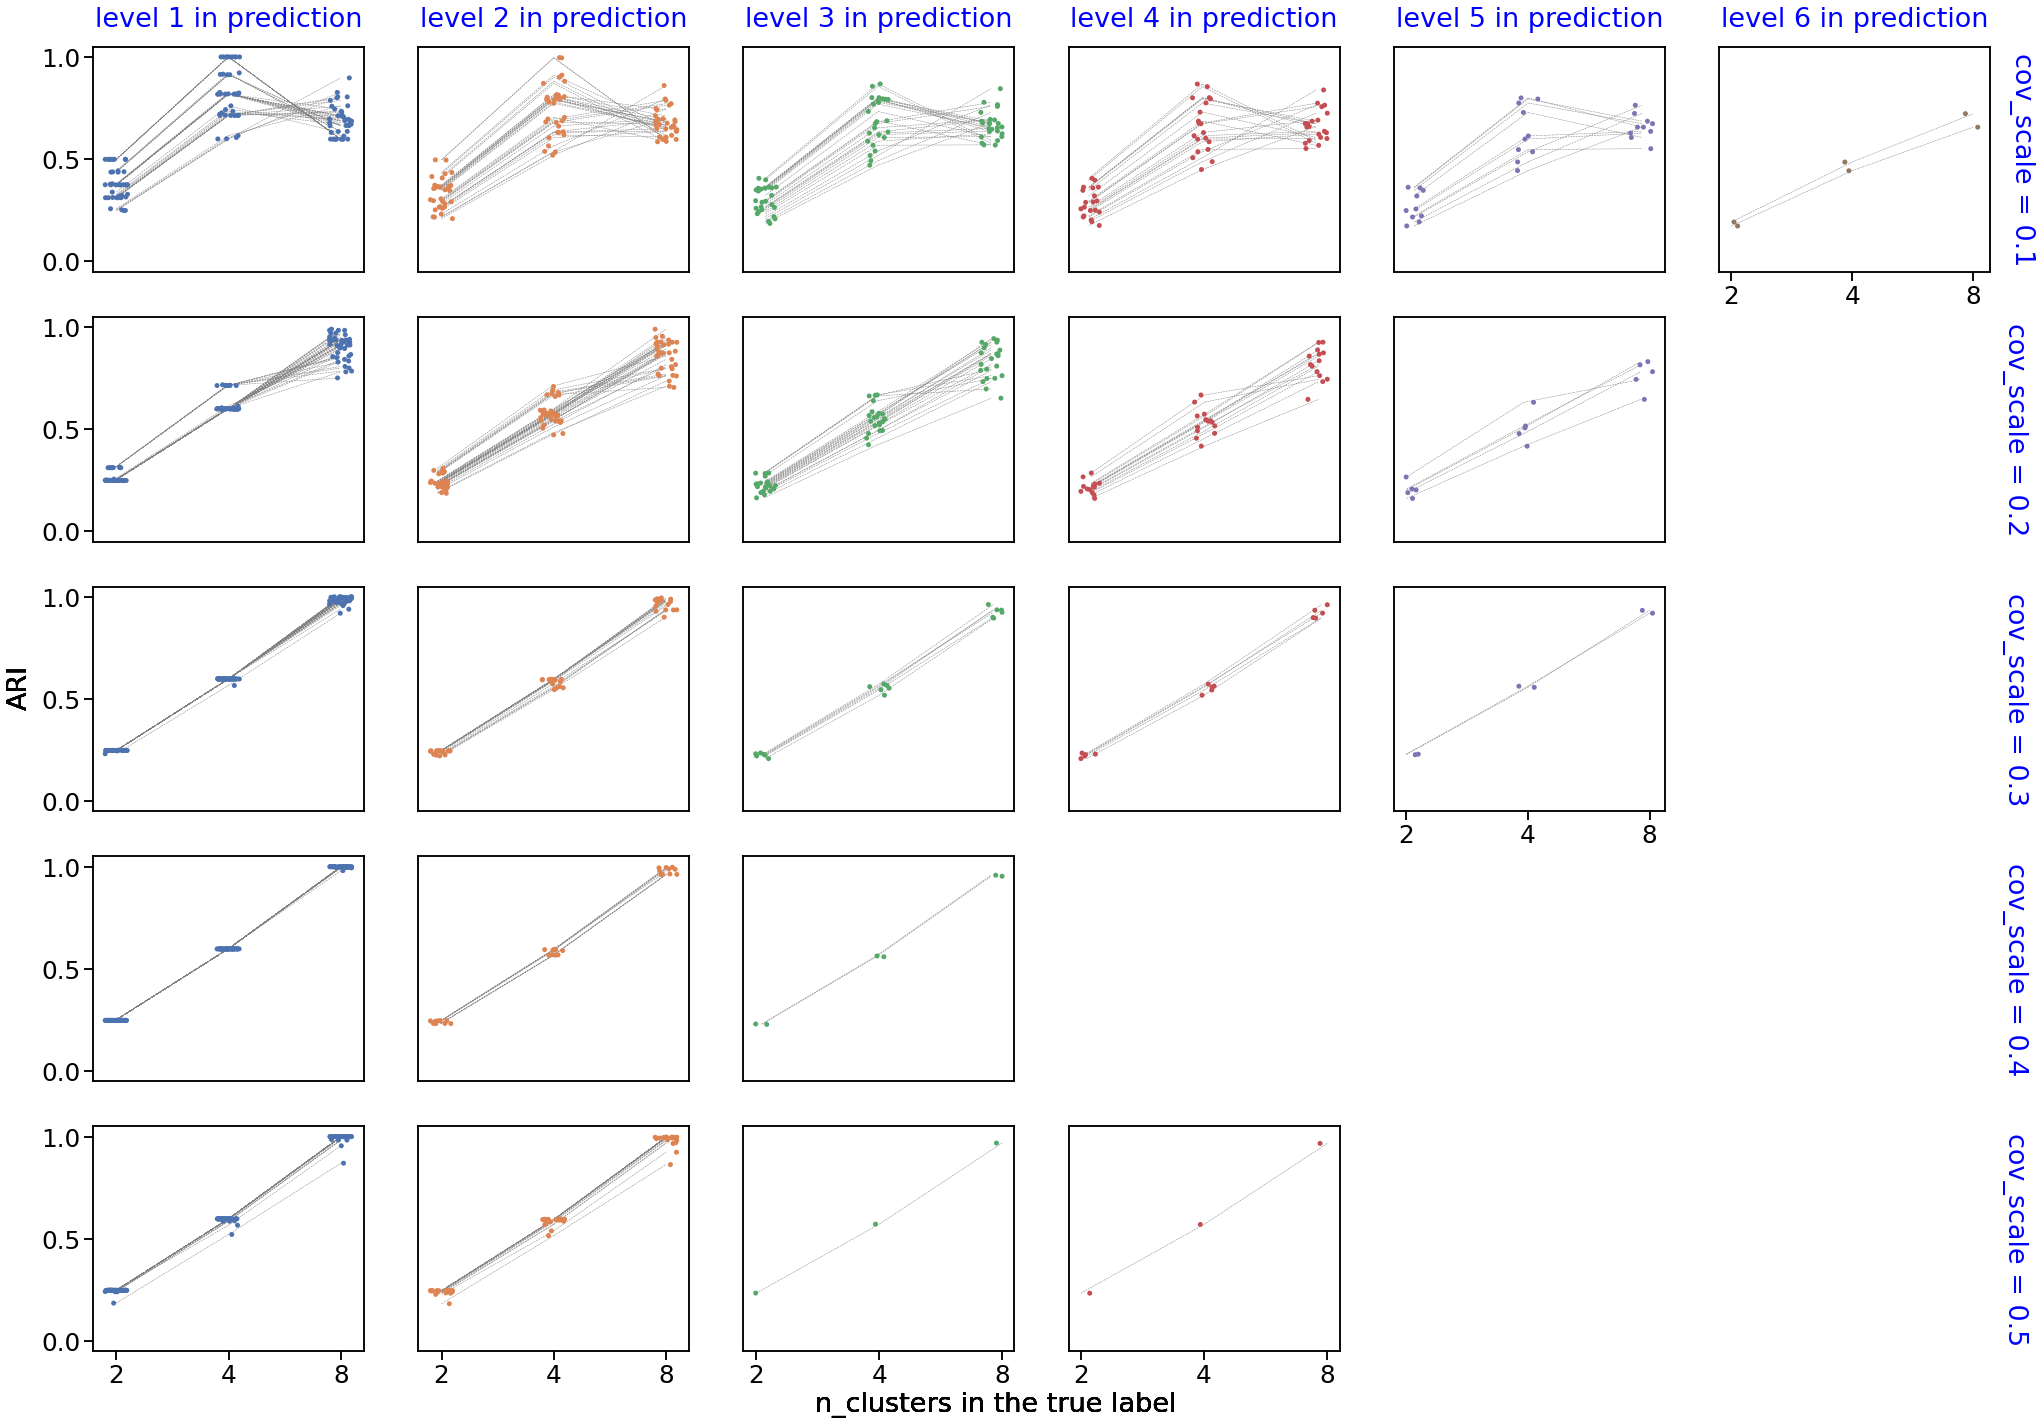

In [268]:
# ns = [[32,33,17,10,19],[25,22,6,2,1],[20,14,5,0,1],[10,5,2],[2]]
fig = plt.figure(figsize=(34,24))
gs = mpl.gridspec.GridSpec(len(scales),6)
for l in range(6):
    for s in range(len(scales)):
        b = [a1[s,i] for i in range(40)]
        b1 = []
        for i in range(40):
            try:
                b1.append(b[i][:,l])
            except IndexError:
                b1.append(np.array([np.nan, np.nan, np.nan]))
                continue
        df = pd.DataFrame(b1)
        df.columns = [2,4,8]
        df1 = df
        df = df.melt(value_vars=[2,4,8], var_name="n_clusters in the true label", value_name="ARI")
        ax = plt.subplot(gs[s,l])
        sns.stripplot(data=df, x="n_clusters in the true label", y="ARI", color = sns.color_palette("deep")[l])
        ax.set(ylim=(-0.05, 1.05))
        for i in range(df1.shape[1]-1):
            ax.plot([np.zeros((40))+i, np.zeros((40))+i+1],[df1.iloc[:,i], df1.iloc[:,i+1]], color = 'grey', linewidth = 0.5, linestyle = '--')
        ax.set(xlabel="")
        ax.set(ylabel="")
        if l == 5:
            if s == 0:
                ax.text(2.3,0.5, "cov_scale = %.1f"%scales[s], rotation=270, color='blue', va="center")
            else:
                ax.text(0.06,0.5, "cov_scale = %.1f"%scales[s], rotation=270, color='blue', va="center")
            # ax.yaxis.set_label_position("right")
        if l > 0:
            ax.set_yticks([])
            
        if s == 0:
            ax.set_title("level %i in prediction"%(l+1), color='blue', pad=20)
            if l < 5:
                ax.set_xticks([])
        if s == 1 or s == 2:
            if l > 4:
                ax.axis("off")
            if s == 1:
                ax.set_xticks([])
            if s == 2 and l < 4:
                ax.set_xticks([])
        if s == 3:
            ax.set_xticks([])
            if l > 2:
                ax.axis("off")
        if s == 4:
            if l > 3:
                ax.axis("off")
        # if c == 0:
        #     ax.set(title="cov_scale\n = %.1f"%scales[s])
        #     ax.text(0,0.75,"n =", ha="center")
        #     ax.text(0,0.65,"40", ha="center")
        #     ax.text(1,0.65, str(ns[0][s]), ha="center")
        #     ax.text(2,0.65, str(ns[1][s]), ha="center")
        #     if s <= 2 or s >= 4:
        #         ax.text(3,0.65, str(ns[2][s]), ha="center")
        #     if s <= 2:
        #         ax.text(4,0.65, str(ns[3][s]), ha="center")
        #     if s <= 0:
        #         ax.text(5,0.65, str(ns[4][s]), ha="center")
    fig.text(0.42,0.09, "n_clusters in the true label")
    fig.text(0.09,0.5, "ARI", rotation=90)

# plt.savefig('2')

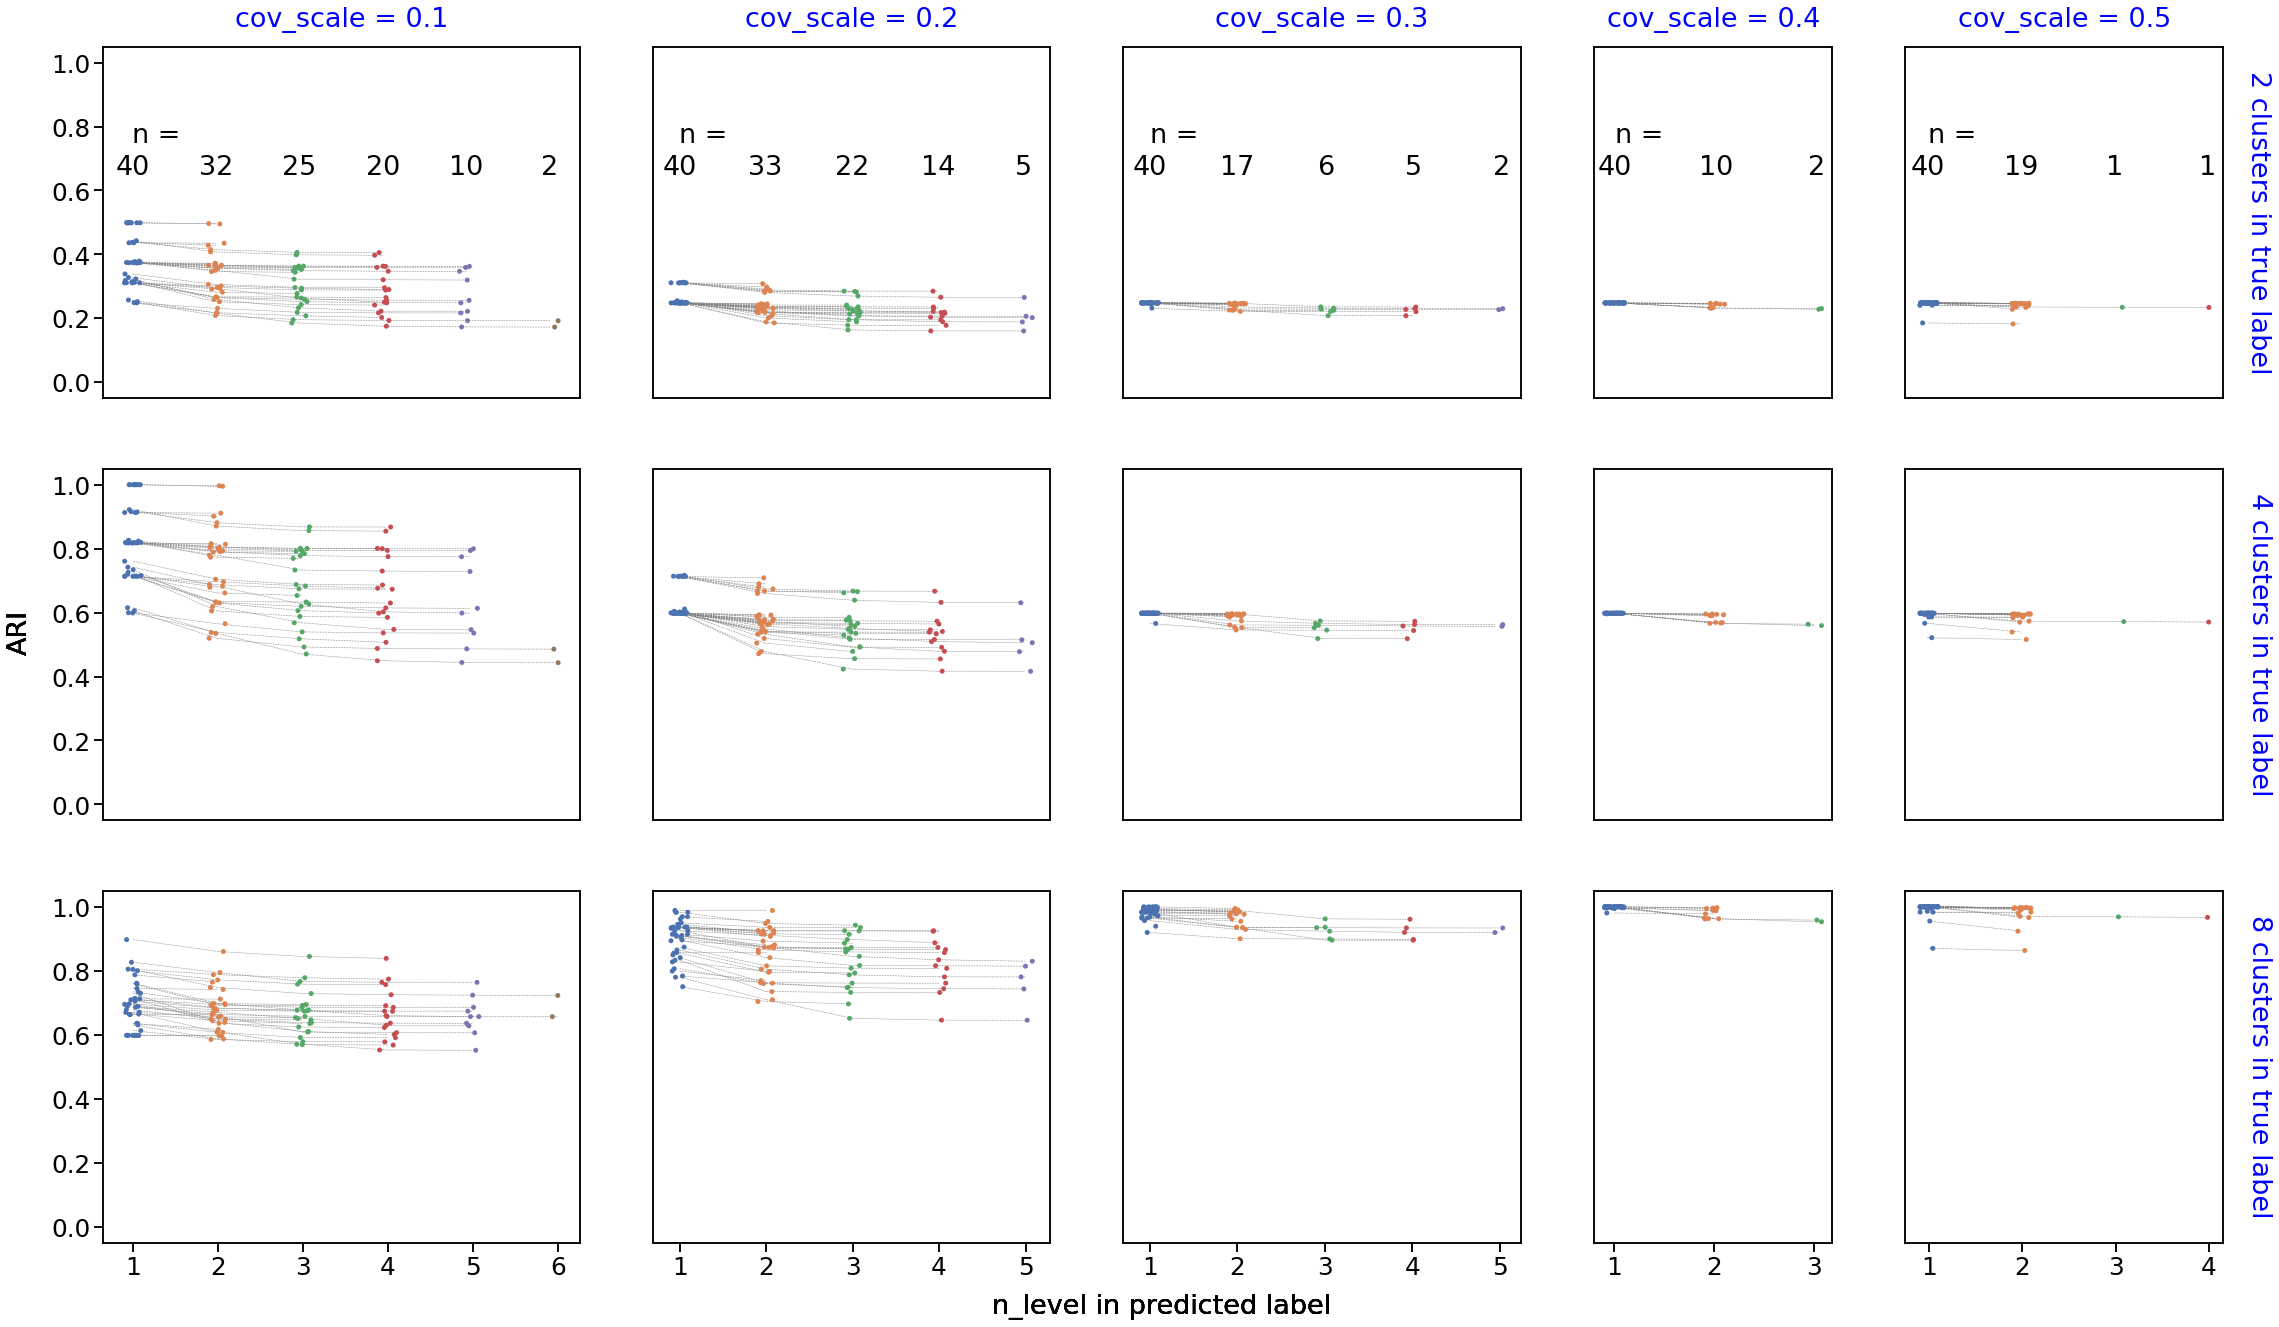

In [269]:
ns = [[32,33,17,10,19],[25,22,6,2,1],[20,14,5,0,1],[10,5,2],[2]]
fig = plt.figure(figsize=(38,22))
gs = mpl.gridspec.GridSpec(a1[0,0].shape[0],len(scales), width_ratios=[6,5,5,3,4])
for s in range(len(scales)):
    b = []
    for i in range(40):
        b.append(a1[s,i])
    for c in range(a1[0,0].shape[0]):
        df = pd.DataFrame([b[i][c,:] for i in range(40)])
        df.columns = [n+1 for n in range(df.shape[1])]
        df1 = df
        df = df.melt(value_vars=[n+1 for n in range(df.shape[1])], var_name="level", value_name="ARI")
        ax = plt.subplot(gs[c,s])
        sns.stripplot(data=df, x="level", y="ARI", ax=ax, palette="deep")
        ax.set(ylim=(-0.05, 1.05))
        # print(df1.shape[1])
        for i in range(df1.shape[1]-1):
            ax.plot([np.zeros((40))+i, np.zeros((40))+i+1],[df1.iloc[:,i], df1.iloc[:,i+1]], color = 'grey', linewidth = 0.5, linestyle = '--')
        ax.set(ylabel="")
        ax.set(xlabel="")
        if s == 4:
            ax.text(3.4,0.5, "%i clusters in true label"%(2**(c+1)), rotation=270, color='blue', va="center")
        if s > 0:
            ax.set_yticks([])
        if c < 2:
            ax.set_xticks([])
        if c == 0:
            ax.set_title("cov_scale = %.1f"%scales[s], color="blue", pad=20)
            ax.text(0,0.75,"n =", ha="left")
            ax.text(0,0.65,"40", ha="center")
            ax.text(1,0.65, str(ns[0][s]), ha="center")
            ax.text(2,0.65, str(ns[1][s]), ha="center")
            if s <= 2 or s >= 4:
                ax.text(3,0.65, str(ns[2][s]), ha="center")
            if s <= 2:
                ax.text(4,0.65, str(ns[3][s]), ha="center")
            if s <= 0:
                ax.text(5,0.65, str(ns[4][s]), ha="center")
    fig.text(0.45,0.08, "n_level in predicted label")
    fig.text(0.09,0.5, "ARI", rotation=90)

plt.savefig("1")

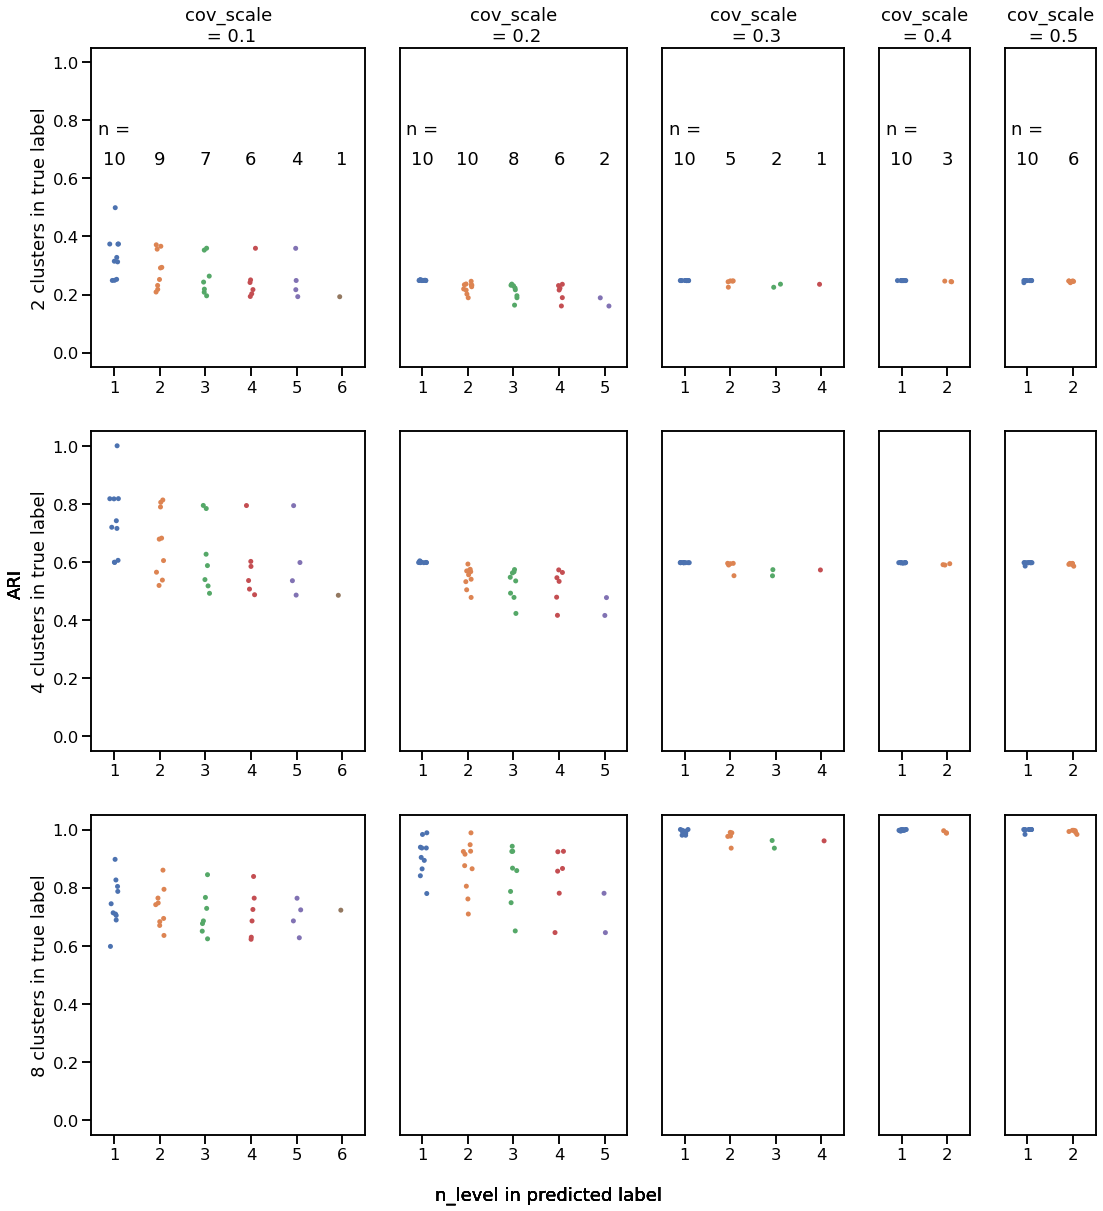

In [259]:
ns = [[9,10,5,3,6],[7,8,2],[6,6,1],[4,2],[1]]
fig = plt.figure(figsize=(18,20))
gs = mpl.gridspec.GridSpec(a[0,0].shape[0],len(scales), width_ratios=[6,5,4,2,2])
for s in range(len(scales)):
    b = []
    for i in range(10):
        b.append(a[s,i])
    for c in range(a[0,0].shape[0]):
        df = pd.DataFrame([b[i][c,:] for i in range(10)])
        df.columns = [n+1 for n in range(df.shape[1])]
        df = df.melt(value_vars=[n+1 for n in range(df.shape[1])], var_name="level", value_name="ARI")
        ax = plt.subplot(gs[c,s])
        sns.stripplot(data=df, x="level", y="ARI", ax=ax, palette="deep")
        ax.set(ylim=(-0.05, 1.05))
        ax.set(xlabel="")
        if s == 0:
            ax.set(ylabel="%i clusters in true label"%(2**(c+1)))
            # ax.set(ylabel="ARI")
        else:
            ax.set(ylabel="")
            ax.set_yticks([])
        if c == 0:
            ax.set(title="cov_scale\n = %.1f"%scales[s])
            ax.text(0,0.75,"n =", ha="center")
            ax.text(0,0.65,"10", ha="center")
            ax.text(1,0.65, str(ns[0][s]), ha="center")
            if s <= 2:
                ax.text(2,0.65, str(ns[1][s]), ha="center")
            if s <= 2:
                ax.text(3,0.65, str(ns[2][s]), ha="center")
            if s <= 1:
                ax.text(4,0.65, str(ns[3][s]), ha="center")
            if s <= 0:
                ax.text(5,0.65, str(ns[4][s]), ha="center")
    fig.text(0.39,0.08, "n_level in predicted label")
    fig.text(0.06,0.5, "ARI", rotation=90)

# plt.tight_layout()
# plt.savefig('1')
